In [1]:
from torch import device, cuda, save, mean, sqrt, sum, pow
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torchsummary import summary
from torch.optim import Adam

from SOBA_dataset import *
from helpers import *
from models import *

c:\Users\Yuri_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
unit = device('cuda:0' if cuda.is_available() else 'cpu')
unit

device(type='cuda', index=0)

In [3]:
directory = "../data/SOBA/"

In [4]:
transform = Compose([
    ToTensor(),
    ])
trainset = SOBA(root=directory,split="train", transform=transform)
testset = SOBA(root=directory,split="test", transform=transform)

In [5]:
gcd = np.gcd(len(trainset), len(testset))
train_batch_size = int(gcd)
test_batch_size = int(len(testset) / len(trainset) * gcd)
train_batch_size, test_batch_size

(150, 60)

In [6]:
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=test_batch_size, shuffle=False)

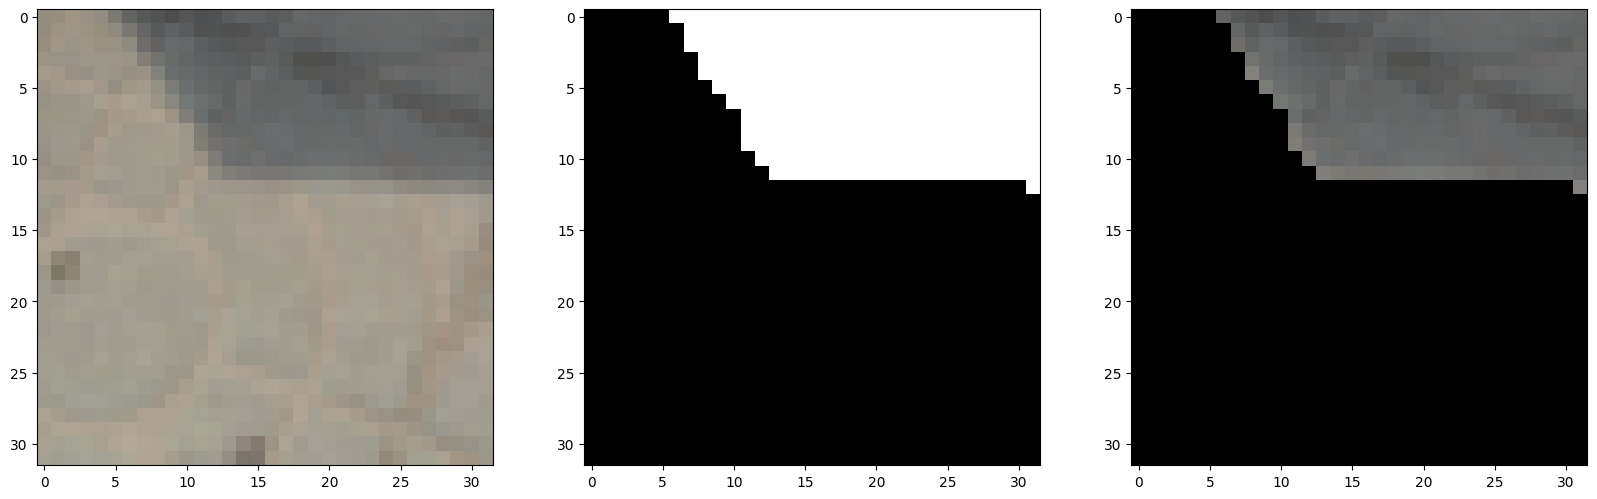

In [7]:
i = np.random.randint(0, len(trainset))
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(trainset[i][0].permute(1, 2, 0).numpy())
axs[1].imshow(trainset[i][1].permute(1, 2, 0).numpy(), cmap = 'gray')
axs[2].imshow((trainset[i][0]*trainset[i][1]).permute(1, 2, 0).numpy())
plt.show()

In [8]:
criterion = CrossEntropyLoss()

In [9]:
vgg19Based = getVGGBased(unit)
summary(vgg19Based, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [10]:
optimizer = Adam(vgg19Based.parameters(), lr=0.001)
history1 = trainNet(unit, vgg19Based, criterion, optimizer, trainloader, testloader, 10, True, {})

epoch 1/10
133/133 [==============================] - 8s 58ms/step - train_DICE: 0.0021 - train_loss: 0.5233 - test_DICE: 0.0030 - test_loss: 0.4856
epoch 2/10
133/133 [==============================] - 8s 57ms/step - train_DICE: 0.0000e+00 - train_loss: 0.5218 - test_DICE: 0.0000e+00 - test_loss: 0.4853
epoch 3/10
133/133 [==============================] - 7s 56ms/step - train_DICE: 0.0000e+00 - train_loss: 0.5218 - test_DICE: 0.0000e+00 - test_loss: 0.4853
epoch 4/10
133/133 [==============================] - 7s 55ms/step - train_DICE: 0.0000e+00 - train_loss: 0.5218 - test_DICE: 0.0000e+00 - test_loss: 0.4853
epoch 5/10
133/133 [==============================] - 7s 55ms/step - train_DICE: 0.0000e+00 - train_loss: 0.5218 - test_DICE: 0.0000e+00 - test_loss: 0.4853
epoch 6/10
133/133 [==============================] - 7s 55ms/step - train_DICE: 0.0000e+00 - train_loss: 0.5218 - test_DICE: 0.0000e+00 - test_loss: 0.4853
epoch 7/10
133/133 [==============================] - 7s 55ms/step

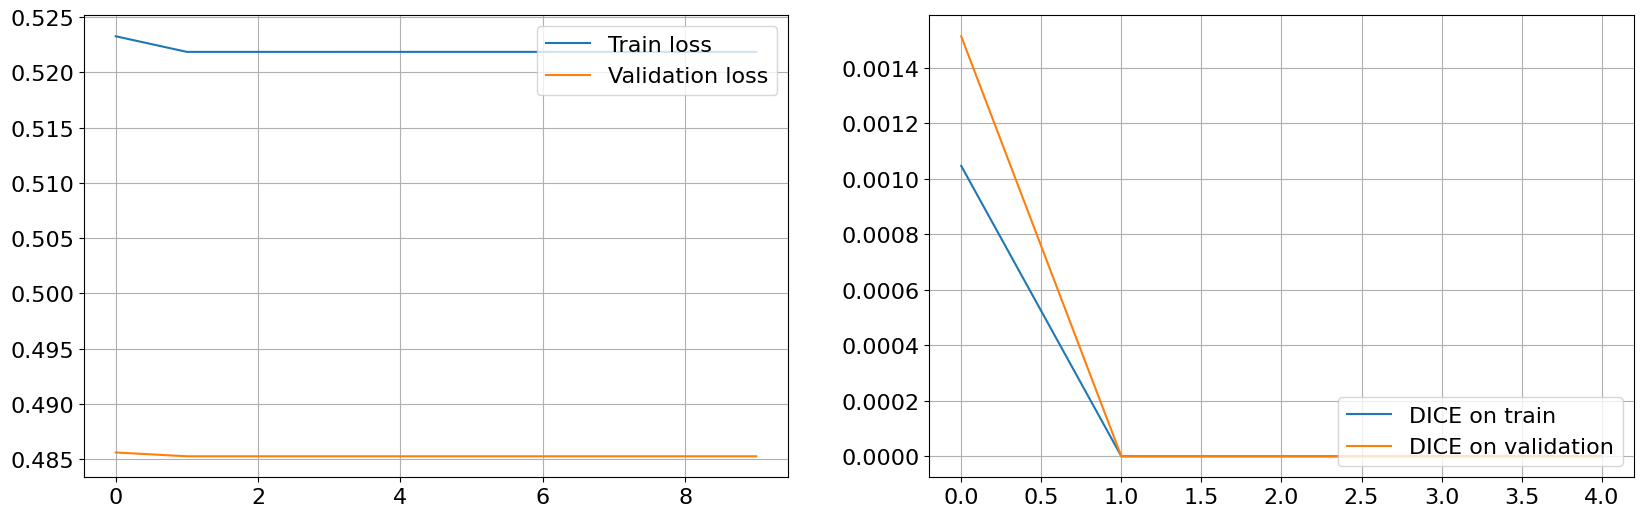

In [11]:
drawGraphs(history1, 266)

In [12]:
save(vgg19Based.state_dict(), PATH + '/vgg19Based')

In [13]:
SSCDnet = getSSCDnet(unit)
summary(SSCDnet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
            Conv2d-2           [-1, 64, 32, 32]          18,496
       BatchNorm2d-3           [-1, 64, 32, 32]             128
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
            Conv2d-7          [-1, 256, 16, 16]         295,168
       BatchNorm2d-8          [-1, 256, 16, 16]             512
              ReLU-9          [-1, 256, 16, 16]               0
        MaxPool2d-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 512, 6, 6]       1,180,160
           Conv2d-12           [-1, 1024, 4, 4]       4,719,616
      BatchNorm2d-13           [-1, 1024, 4, 4]           2,048
             ReLU-14           [-1, 102

In [14]:
optimizer = Adam(SSCDnet.parameters(), lr=0.0001)
history3 = trainNet(unit, SSCDnet, criterion, optimizer, trainloader, testloader, 25, True, {})

epoch 1/25
133/133 [==============================] - 15s 112ms/step - train_DICE: 0.6159 - train_loss: 0.4488 - test_DICE: 0.6101 - test_loss: 0.4377
epoch 2/25
133/133 [==============================] - 15s 109ms/step - train_DICE: 0.7819 - train_loss: 0.3986 - test_DICE: 0.7434 - test_loss: 0.3981
epoch 3/25
133/133 [==============================] - 15s 110ms/step - train_DICE: 0.8136 - train_loss: 0.3857 - test_DICE: 0.7405 - test_loss: 0.3993
epoch 4/25
133/133 [==============================] - 15s 110ms/step - train_DICE: 0.8482 - train_loss: 0.3731 - test_DICE: 0.7642 - test_loss: 0.3899
epoch 5/25
133/133 [==============================] - 15s 110ms/step - train_DICE: 0.8691 - train_loss: 0.3653 - test_DICE: 0.7620 - test_loss: 0.3905
epoch 6/25
133/133 [==============================] - 15s 110ms/step - train_DICE: 0.8796 - train_loss: 0.3611 - test_DICE: 0.7595 - test_loss: 0.3935
epoch 7/25
133/133 [==============================] - 15s 110ms/step - train_DICE: 0.8947 - tr

In [15]:
save(SSCDnet.state_dict(), PATH + '/SSCDnet')

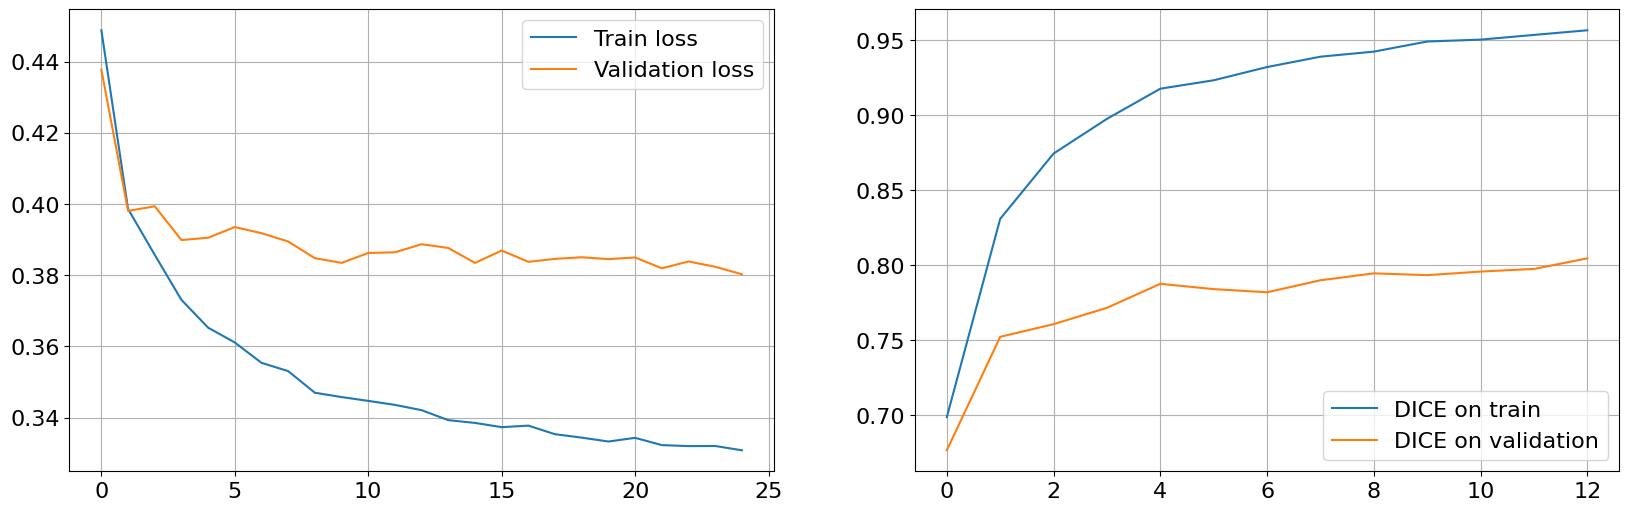

In [16]:
drawGraphs(history3, 266)

In [17]:
testloader_it = iter(testloader)
for i in range(np.random.randint(0,len(testloader))):
    images, masks = next(testloader_it)
images, masks = next(iter(testloader))[:20]
images = images.to(unit)

predicted_masks = SSCDnet(images).detach().cpu()

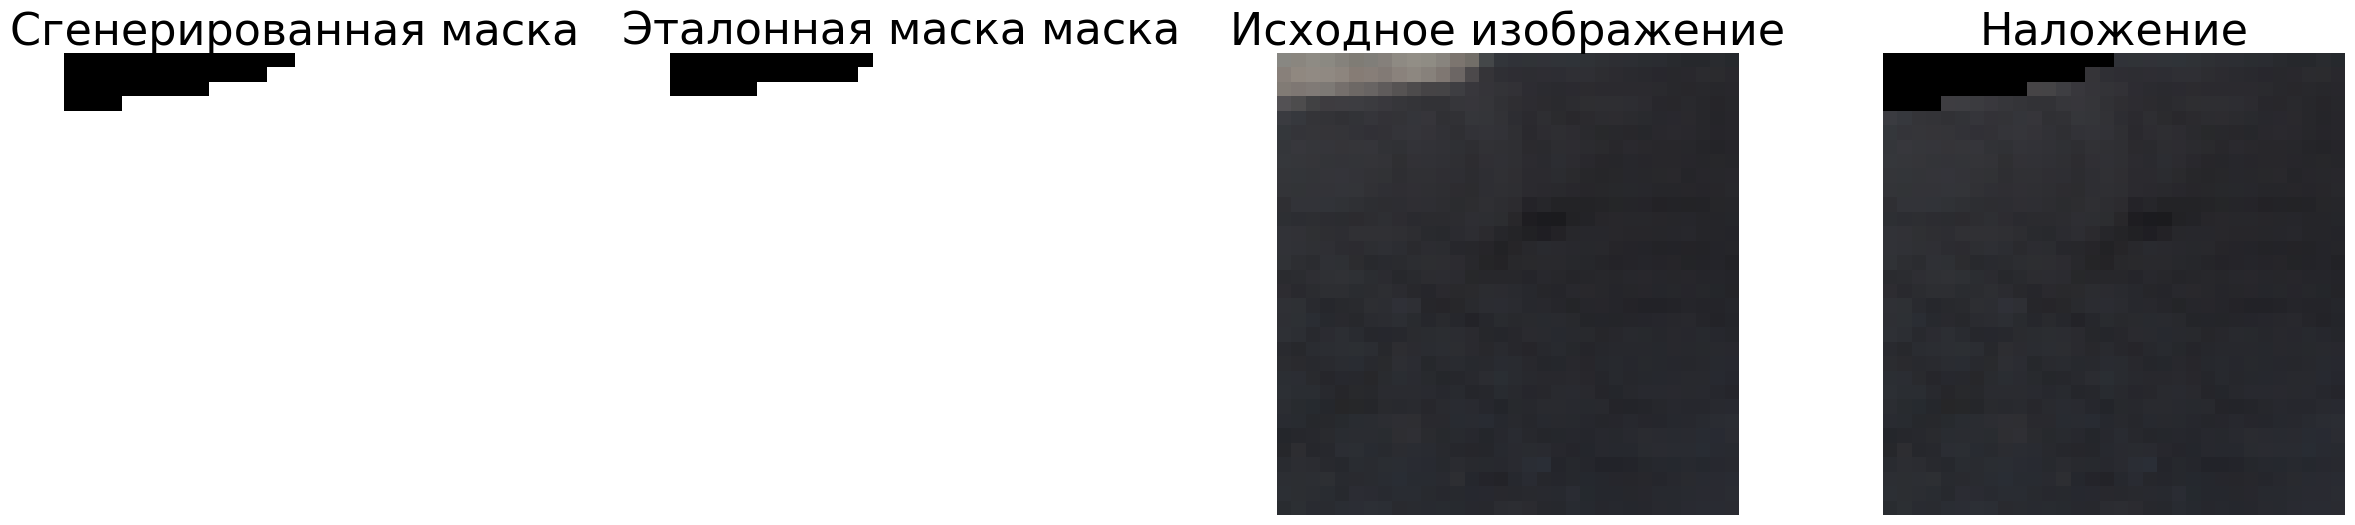

In [18]:
i = np.random.randint(0, test_batch_size)

mask_p = np.array((predicted_masks[i]>0.5).float())
mask = masks[i]
image = images[i].detach().cpu()
fig, axs = plt.subplots(1, 4, figsize=(30, 6))
axs[0].imshow(mask_p.reshape((32, 32)), cmap = 'gray')
axs[0].set_axis_off()
axs[0].set_title('Сгенерированная маска', fontsize=32)
axs[1].imshow(mask.permute(1, 2, 0).numpy(), cmap = 'gray')
axs[1].set_axis_off()
axs[1].set_title('Эталонная маска маска', fontsize=32)
axs[2].imshow(image.permute(1, 2, 0).numpy())
axs[2].set_axis_off()
axs[2].set_title('Исходное изображение', fontsize=32)
axs[3].imshow((image*mask_p.reshape((32, 32))).permute(1, 2, 0).numpy())
axs[3].set_axis_off()
axs[3].set_title('Наложение', fontsize=32)
plt.show()

In [19]:
transform = Compose([
    ToTensor(),
    ])
trainset = SOBA(root=directory,split="train", transform=transform, mode = "shadow removing")
testset = SOBA(root=directory,split="test", transform=transform, mode = "shadow removing")

In [20]:
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=test_batch_size, shuffle=False)

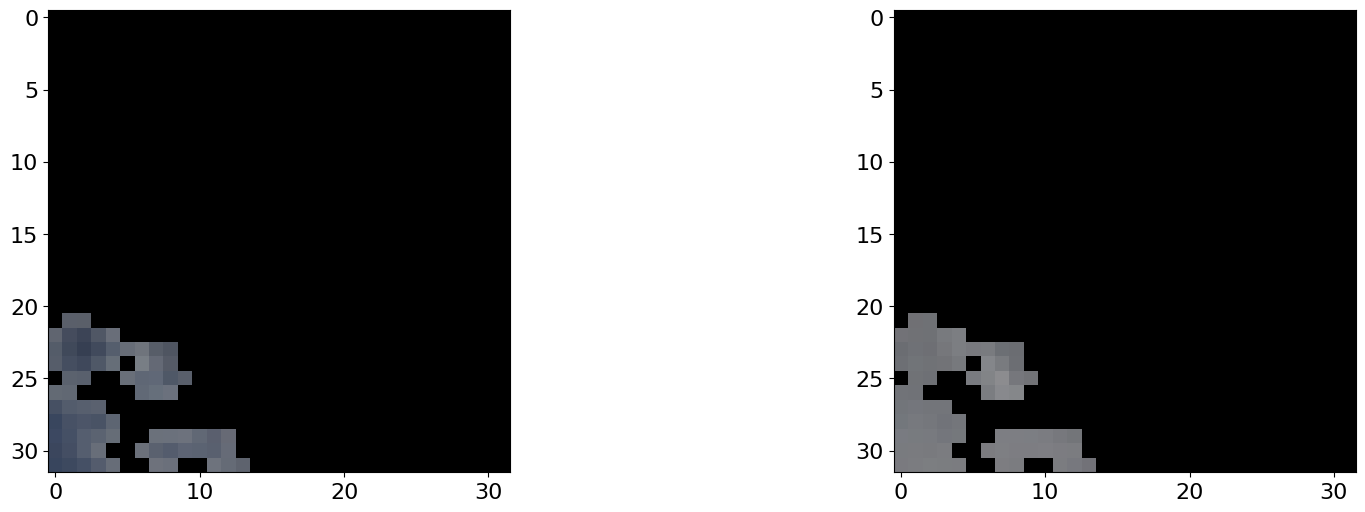

In [21]:
i = np.random.randint(0, len(trainset))
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].imshow(trainset[i][0].permute(1, 2, 0).numpy())
axs[1].imshow(trainset[i][1].permute(1, 2, 0).numpy(), cmap = 'gray')
plt.show()

In [22]:
crModel = getCallorRestorer(unit)
summary(crModel, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
              ReLU-2           [-1, 32, 30, 30]               0
       BatchNorm2d-3           [-1, 32, 30, 30]              64
            Conv2d-4           [-1, 64, 28, 28]          18,496
              ReLU-5           [-1, 64, 28, 28]               0
       BatchNorm2d-6           [-1, 64, 28, 28]             128
            Conv2d-7          [-1, 128, 26, 26]          73,856
              ReLU-8          [-1, 128, 26, 26]               0
   ConvTranspose2d-9           [-1, 64, 28, 28]          73,792
             ReLU-10           [-1, 64, 28, 28]               0
  ConvTranspose2d-11           [-1, 32, 30, 30]          18,464
             ReLU-12           [-1, 32, 30, 30]               0
      BatchNorm2d-13           [-1, 32, 30, 30]              64
  ConvTranspose2d-14           [-1, 32,

In [23]:
optimizer = Adam(crModel.parameters(), lr=0.0001)
criterion = lambda result, target:  mean(sqrt(sum(pow(result - target, 2), dim=1)))
history4 = trainNet(unit, crModel, criterion, optimizer, trainloader, testloader, 25, False, {})

epoch 1/25
133/133 [==============================] - 3s 22ms/step - train_loss: 0.3812 - test_loss: 0.4152
epoch 2/25
133/133 [==============================] - 3s 22ms/step - train_loss: 0.1110 - test_loss: 0.1402
epoch 3/25
133/133 [==============================] - 3s 22ms/step - train_loss: 0.0610 - test_loss: 0.0765
epoch 4/25
133/133 [==============================] - 3s 21ms/step - train_loss: 0.0463 - test_loss: 0.0558
epoch 5/25
133/133 [==============================] - 3s 21ms/step - train_loss: 0.0392 - test_loss: 0.0453
epoch 6/25
133/133 [==============================] - 3s 21ms/step - train_loss: 0.0356 - test_loss: 0.0399
epoch 7/25
133/133 [==============================] - 3s 22ms/step - train_loss: 0.0330 - test_loss: 0.0356
epoch 8/25
133/133 [==============================] - 3s 22ms/step - train_loss: 0.0322 - test_loss: 0.0344
epoch 9/25
133/133 [==============================] - 3s 22ms/step - train_loss: 0.0306 - test_loss: 0.0320
epoch 10/25
133/133 [=======

In [24]:
save(crModel.state_dict(), PATH + '/crModel2_v3')

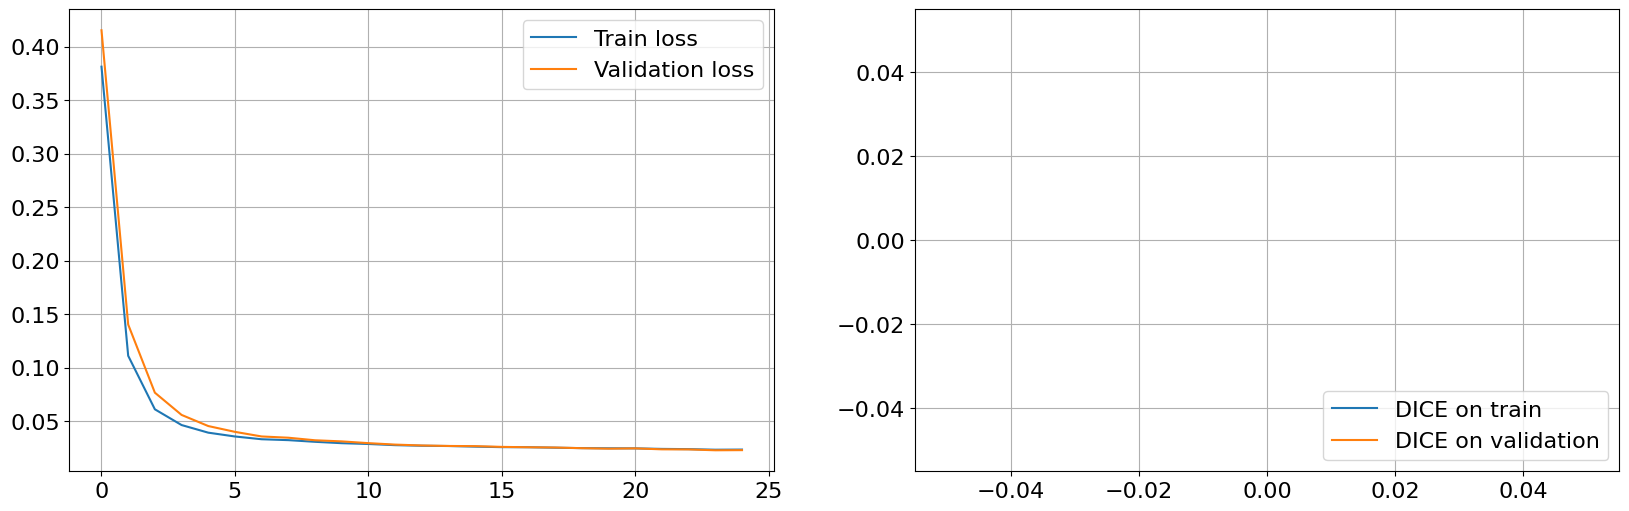

In [25]:
drawGraphs(history4, 133)

In [26]:
testloader_it = iter(testloader)
for i in range(np.random.randint(0,len(testloader))):
    images, masks = next(testloader_it)

images = images.to(unit)

remove_shedov = crModel(images).detach().cpu()

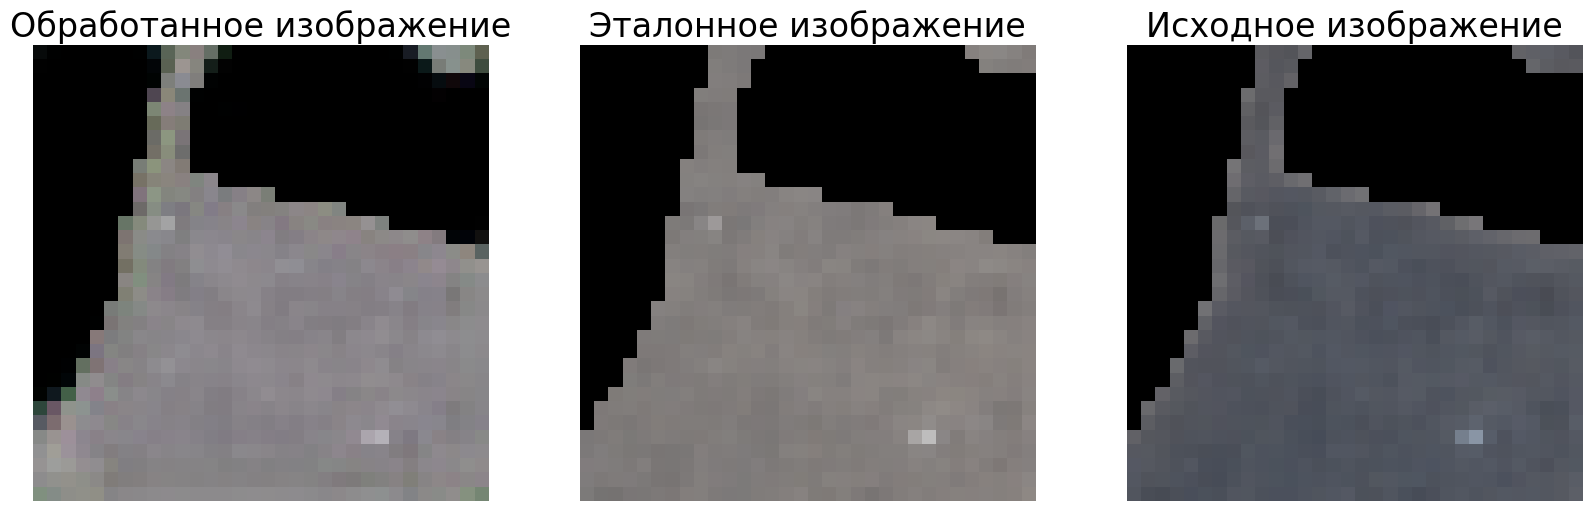

In [27]:
i = np.random.randint(0, test_batch_size)

mask = masks[i]
mask_p = remove_shedov[i].detach().cpu()
image = images[i].detach().cpu()
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(mask_p.permute(1, 2, 0).numpy())
axs[0].set_axis_off()
axs[0].set_title('Обработанное изображение', fontsize=24)
axs[1].imshow(mask.permute(1, 2, 0).numpy())
axs[1].set_axis_off()
axs[1].set_title('Эталонное изображение', fontsize=24)
axs[2].imshow(image.permute(1, 2, 0).numpy())
axs[2].set_axis_off()
axs[2].set_title('Исходное изображение', fontsize=24)
plt.show()

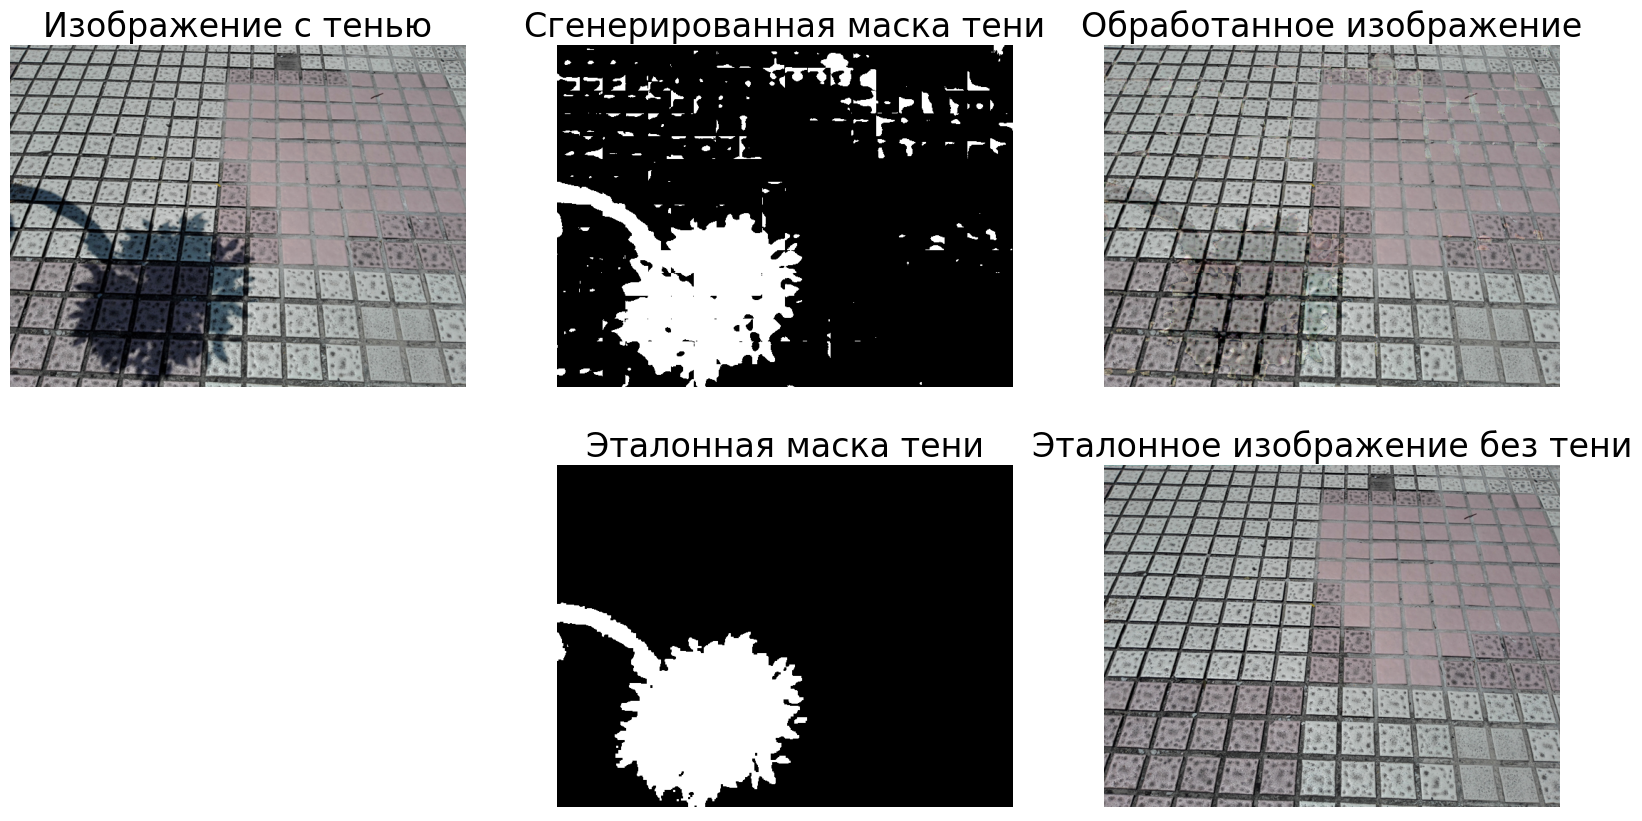

In [28]:
image_s = (Image.open('C:/Users/Yuri_PC/Desktop/books_doc/diploma/2023 - 2024/autumn-winter/article#1/data/SOBA/test/test_A/105-19.png').convert('RGB'))
shadow = (Image.open('C:/Users/Yuri_PC/Desktop/books_doc/diploma/2023 - 2024/autumn-winter/article#1/data/SOBA/test/test_B/105-19.png').convert('L'))
image = (Image.open('C:/Users/Yuri_PC/Desktop/books_doc/diploma/2023 - 2024/autumn-winter/article#1/data/SOBA/test/test_C/105-19.png').convert('RGB'))

ful_mask, image_p = processImage(image_s, SSCDnet, crModel, unit)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0][0].imshow(image_s)
axs[0][0].set_title('Изображение с тенью', fontsize=24)
axs[0][0].set_axis_off()
axs[0][1].imshow(ful_mask, cmap = 'gray')
axs[0][1].set_title('Сгенерированная маска тени', fontsize=24)
axs[0][1].set_axis_off()
axs[0][2].imshow(image_p)
axs[0][2].set_title('Обработанное изображение', fontsize=24)
axs[0][2].set_axis_off()
axs[1][0].set_axis_off()
axs[1][1].imshow(shadow, cmap = 'gray')
axs[1][1].set_title('Эталонная маска тени', fontsize=24)
axs[1][1].set_axis_off()
axs[1][2].imshow(image)
axs[1][2].set_title('Эталонное изображение без тени', fontsize=24)
axs[1][2].set_axis_off()
plt.show()

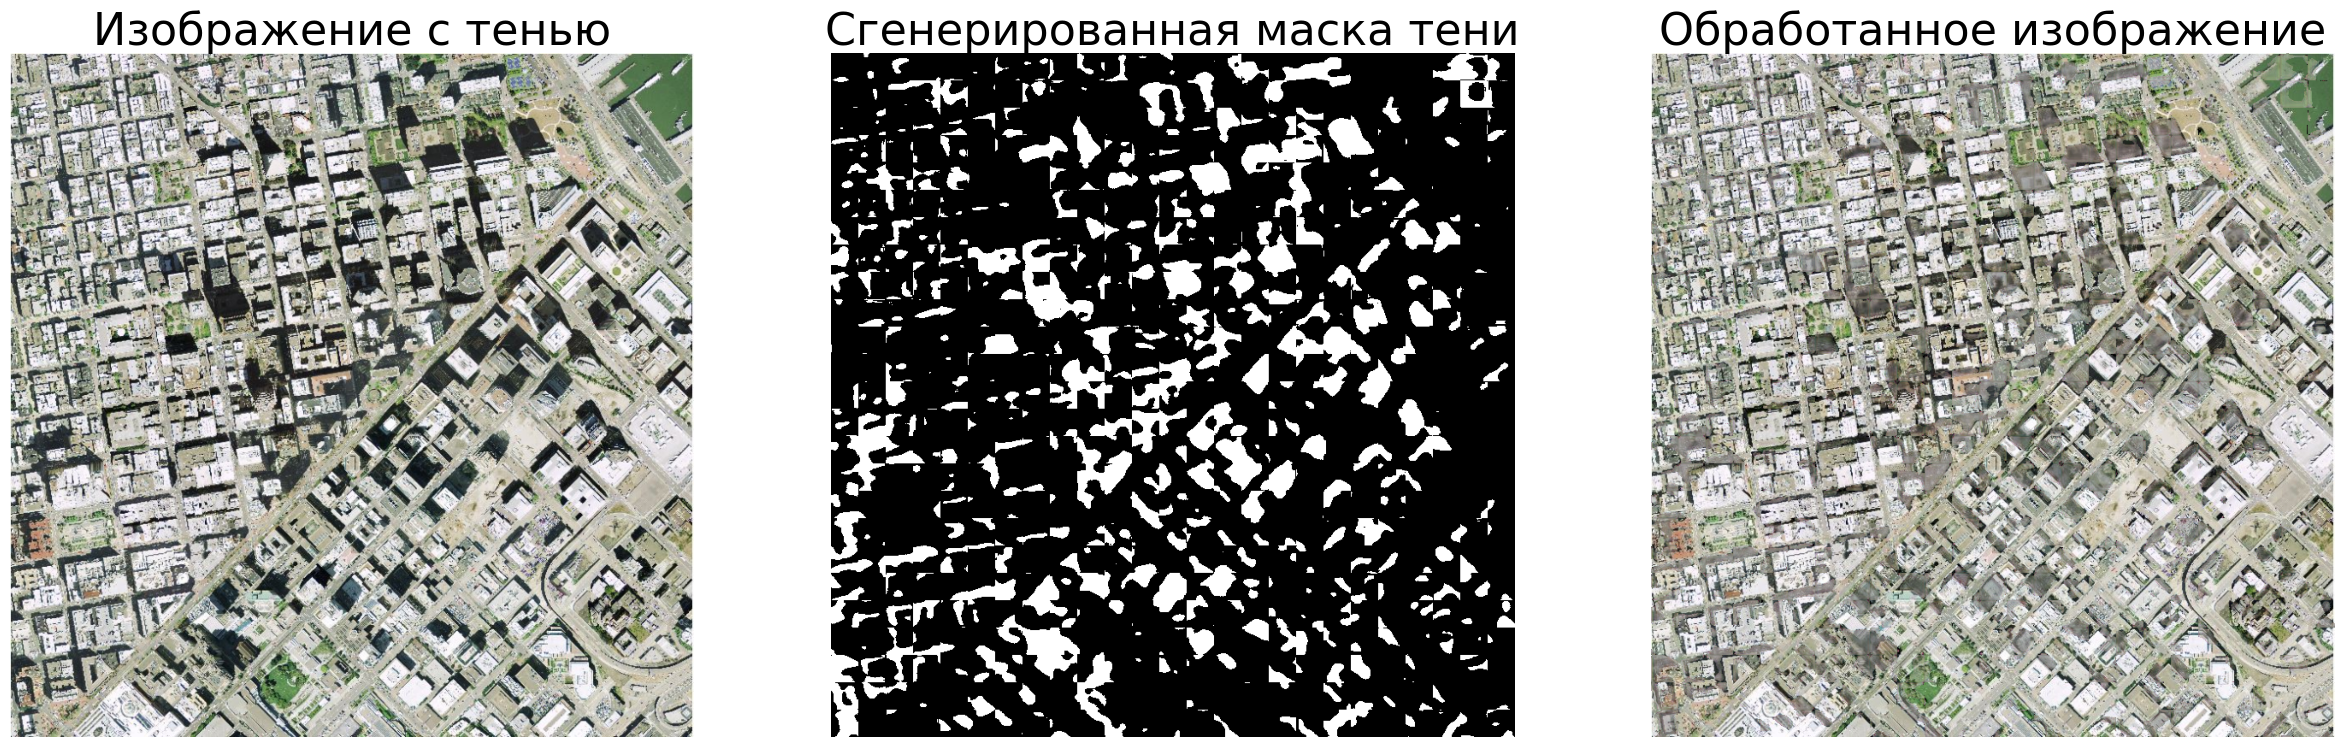

In [29]:
image = Resize((800, 800))(Image.open('C:/Users/Yuri_PC/Desktop/books_doc/diploma/2023 - 2024/autumn-winter/article#1/data/Test_Image.jpeg').convert('RGB'))

ful_mask, image_p = processImage(image, SSCDnet, crModel, unit)

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].imshow(image)
axs[0].set_title('Изображение с тенью', fontsize=32)
axs[0].set_axis_off()
axs[1].imshow(ful_mask, cmap = 'gray')
axs[1].set_title('Сгенерированная маска тени', fontsize=32)
axs[1].set_axis_off()
axs[2].imshow(image_p)
axs[2].set_title('Обработанное изображение', fontsize=32)
axs[2].set_axis_off()

plt.show()